# CLEANING PIEZO VARIABLES

Data Cleaning is the first step of any Data Science project and can sometimes be very time consuming.
It involves identifying and correcting errors, inconsistencies or incomplete data within a dataset.

1. Handle missing values
2. Remove duplicates/irrelevant or hard to preprocess variables
3. Clean text data with an incorrect format

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from utils import *

In [2]:
df_train = pd.read_csv('X_train_Hi5.csv', nrows=100000)
df_test = pd.read_csv('X_test_Hi5.csv', nrows=100000)


In [3]:
df = df_train.filter(regex='^piezo')

In [4]:
# Affichage des noms des variables
variables = df.columns.tolist()

The `.info()` function allows you to check:

1. The number of "non-null" values (number of rows without a NaN value)
2. The data type (or dtype of each column)
3. The number of rows and the columns present in the dataset

In [5]:
df.head()

,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,...,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_code,piezo_continuity_name,piezo_producer_code,piezo_producer_name,piezo_measure_nature_code,piezo_measure_nature_name,piezo_groundwater_level_category
0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,Ceyzérieu,...,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel,High
1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,Saint-Jean-le-Vieux,...,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel,Very High
2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,Meximieux,...,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel,High
3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,Péron,...,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel,Very High
4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,Tossiat,...,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel,Very Low


In [6]:
df.isnull().sum()
#for col, count in temp.items():


piezo_station_department_code           0
piezo_station_update_date               0
piezo_station_investigation_depth    6114
piezo_station_department_name           0
piezo_station_commune_code_insee        0
piezo_station_pe_label               8083
piezo_station_bdlisa_codes           4864
piezo_station_altitude                  0
piezo_station_bss_code                  0
piezo_station_commune_name              0
piezo_station_longitude                 0
piezo_station_latitude                  0
piezo_station_bss_id                    0
piezo_bss_code                          0
piezo_measurement_date                  0
piezo_obtention_mode                    0
piezo_status                            0
piezo_qualification                     0
piezo_continuity_code                   0
piezo_continuity_name                   0
piezo_producer_code                  5720
piezo_producer_name                  5720
piezo_measure_nature_code            4362
piezo_measure_nature_name         

## 1. Analysis of the Different Variables

It can be observed that `piezo_producer_name` and `piezo_producer_code` encode the same information.

Same analysis for (`piezo_measure_nature_name`, `piezo_measure_nature_code`)<br>and (`piezo_continuity_name`,`piezo_continuity_code`)<br>and (`piezo_station_department_name`,`piezo_station_department_code`).

In [7]:
# Check if each value of 'piezo_producer_name' has a unique 'piezo_producer_code'.
compare(df, 'piezo_producer_name', 'piezo_producer_code')

Each value in piezo_producer_name is associated with a unique identifier in piezo_producer_code.
Each identifier in piezo_producer_code is associated with a single value in piezo_producer_name.


We also can observe that `piezo_station_bss_code` and `piezo_station_bss_id` are variables that are suppose to identify a station, as long as we do not need 2 ids, we do not need both of them.

In [8]:
# Check if each value of 'piezo_station_bss_code' has a unique 'piezo_station_bss_id'.
compare(df, 'piezo_station_bss_code', 'piezo_station_bss_id')

Each value in piezo_station_bss_code is associated with a unique identifier in piezo_station_bss_id.
Each identifier in piezo_station_bss_id is associated with a single value in piezo_station_bss_code.


## 2. Study of categorical variables

`piezo_station_pe_label` is categorical variable with 2551 different labels. We drop this var for that very reason.

In [9]:
len(df['piezo_station_pe_label'].unique())

2440

Same for `piezo_station_bdlisa_codes` and `piezo_station_commune_name`

In [10]:
len(df['piezo_station_bdlisa_codes'].unique())
len(df['piezo_station_commune_name'].unique())

2194

## 3. Data Processing

Real-word data often contains missing values. This can be due to technical failures, data entry issues, incompatible data formats or even intentional omissions (for privacy concerns). Examples include a lack of response to a survey or equipment failures when collecting data.

Here is a list of strategies to handle missing values:

- Replace NaN with the mean or median value (for continuous data)
- Replace NaN with the most frequent value (for categorical data)
- Create a new category for the missing values (for categorical data)
- Use a Machine Learning model to predict the missing values (KNN, Random Forest,...)

### Selection of variables with missing values

This code identifies and prints the names of columns that contain missing (NaN) values in the DataFrame, helping to detect and address missing data.

In [11]:
missing_columns = df.columns[df.isna().sum() > 0].tolist()
print(missing_columns)

['piezo_station_investigation_depth', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name']


### Standardization of object-type columns

Standardization of `object-type` columns and columns names (not required here as long as features are already standardized)

In [12]:
# Standardize object-type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# Standardize column names to simplify their manipulation
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

/tmp/ipykernel_116541/3121806354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.strip()
/tmp/ipykernel_116541/3121806354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)


### Duplicates

This removes duplicate rows from the DataFrame, ensuring that each row is unique. It's useful to avoid redundancy and improve the quality of the data before further analysis or modeling.

In [13]:
df.drop_duplicates(inplace=True)

/tmp/ipykernel_116541/3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### piezo_qualification

This filters out rows where the 'piezo_qualification' column is labeled as 'Incorrecte', removing data that may be unreliable or not suitable for analysis.

In [14]:
df = df[df['piezo_qualification'] != 'Incorrecte']

### piezo_continuity_code

This operation shifts the values of the variable `piezo_continuity_code` from [1, 2] to [0, 1], making it zero-based. This is often done because many machine learning models and libraries expect categorical variables or class labels to start at 0.

In [15]:
df.loc[:, 'piezo_continuity_code'] = df['piezo_continuity_code'] - 1

### piezo_measure_nature_code

We fill missing values in `piezo_measure_nature_code` using the mode as long as the feature is a categorical one. It's used here to ensure the dataset has no missing values, which is crucial for most machine learning algorithms to work effectively.

In [16]:
column_filler(df, 'piezo_measure_nature_code')

### piezo_measurement_date

This code converts dates into the number of days elapsed since January 1, 2020. This allows machine learning models to process temporal information in a numerical format and identify time-related trends.

In [17]:
# Apply the function days_since_start_of_2020 to the 'piezo_measurement_date' column
df.loc[:, 'days_since_2020'] = df['piezo_measurement_date'].apply(days_since_start_of_2020)


### Categorical features processing

In [22]:
keeped_var = [
    'piezo_station_investigation_depth',
    'piezo_station_altitude',
    'piezo_station_longitude',
    'piezo_station_latitude',
    'days_since_2020',
    'piezo_obtention_mode',
    'piezo_status',
    'piezo_continuity_code',
    'piezo_qualification',
    'piezo_groundwater_level_category'
]
df_clean = df[keeped_var]

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = le.fit_transform(df_clean[col])

/tmp/ipykernel_116541/1923917862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipykernel_116541/1923917862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipykernel_116541/1923917862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

# Interesting Features Selection

This code aims to analyze the importance of certain features to predict `piezo_groundwater_level_category`.

/tmp/ipykernel_116541/3628744730.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipykernel_116541/3628744730.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
/tmp/ipykernel_116541/3628744730.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

                             Feature  Importance
4                    days_since_2020    0.229602
3             piezo_station_latitude    0.204088
2            piezo_station_longitude    0.200302
1             piezo_station_altitude    0.172301
0  piezo_station_investigation_depth    0.168873
6                       piezo_status    0.013940
5               piezo_obtention_mode    0.006648
8                piezo_qualification    0.003989
7              piezo_continuity_code    0.000259


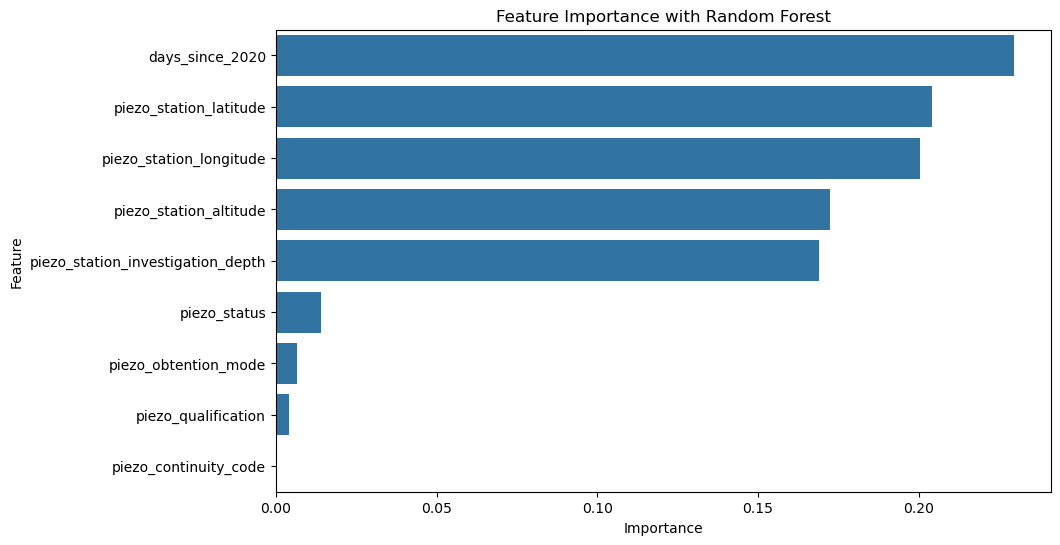

F1 Score: 0.9402739141854485


In [ ]:
var = "piezo_groundwater_level_category"

# 2. Separate explanatory variables (X) and the target variable (y)
X = df_clean.drop(columns=[var])
y = df_clean[var]

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Display feature importance
importances = model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by descending importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importance)

# 6. Visualize feature importance as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance with Random Forest')
plt.show()

# 7. Predict the target variable on the test set
y_pred = model.predict(X_test)

# 8. Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # For multi-class classification, weighted average
print(f'F1 Score: {f1}')

We select the relevant features `piezo_features` because they are the variables deemed most important for making accurate predictions. This allows us to focus on the key data while reducing noise and improving the model's performance.

In [19]:
piezo_features = ['days_since_2020', 'piezo_station_latitude', 'piezo_station_longitude', 'piezo_station_altitude', 'piezo_station_investigation_depth']

## Heat Map

The function `plot_correlation_matrix` is used to visualize the relationships between numerical variables in the dataset by displaying a heatmap of their correlation matrix. This helps in identifying highly correlated features, which may indicate redundancy or relationships that could impact the model's performance.

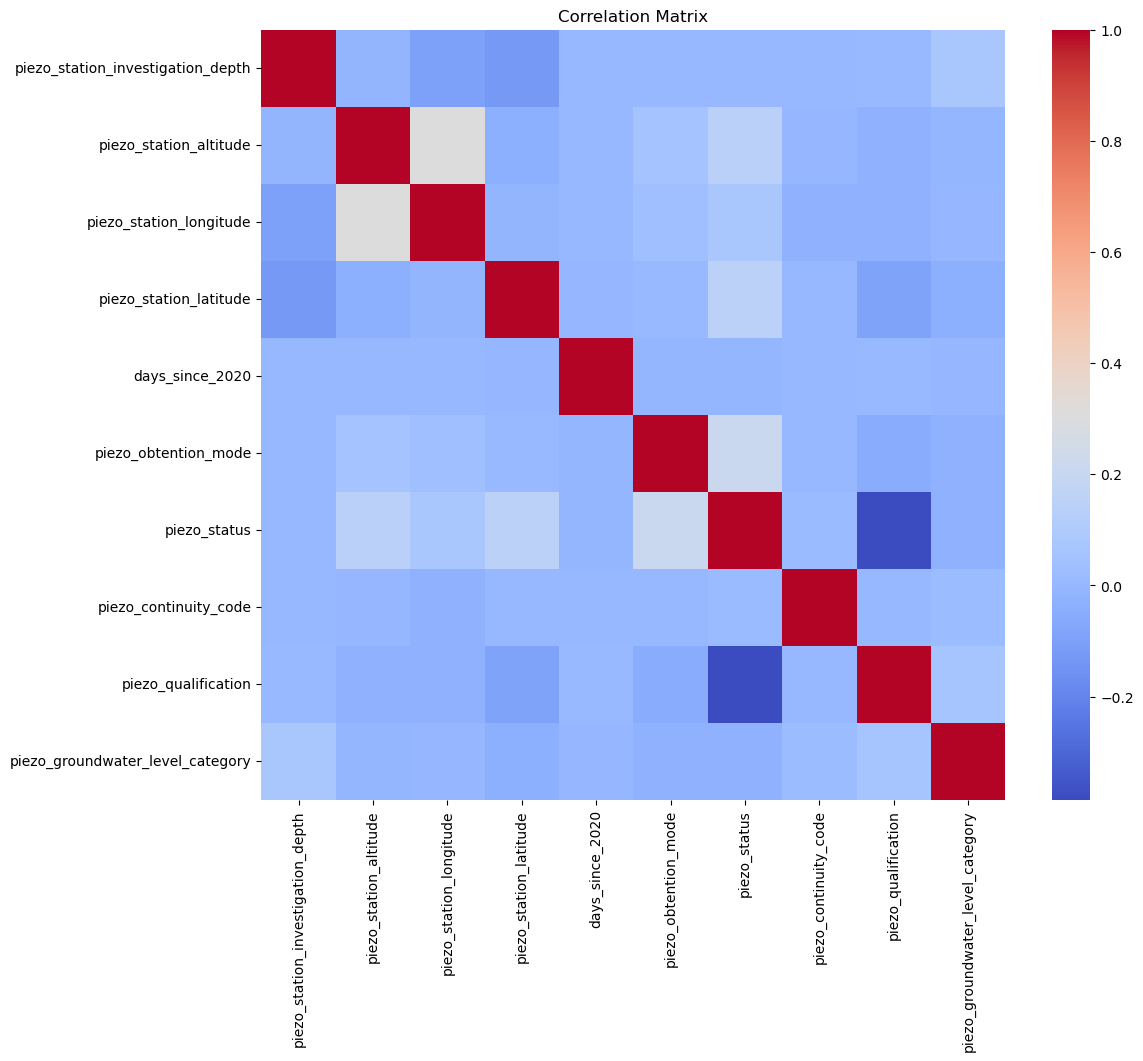

,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,days_since_2020,piezo_obtention_mode,piezo_status,piezo_continuity_code,piezo_qualification,piezo_groundwater_level_category
piezo_station_investigation_depth,1.000000,-0.012510,-0.098752,-0.129503,-0.000083,0.001791,0.001683,0.003959,0.009534,0.077089
piezo_station_altitude,-0.012510,1.000000,0.310857,-0.037916,0.001211,0.055510,0.142995,-0.005967,-0.030904,-0.010607
piezo_station_longitude,-0.098752,0.310857,1.000000,-0.013340,0.002575,0.033427,0.079799,-0.024342,-0.022777,-0.004455
piezo_station_latitude,-0.129503,-0.037916,-0.013340,1.000000,-0.003326,0.004682,0.148962,0.001263,-0.091422,-0.042356
days_since_2020,-0.000083,0.001211,0.002575,-0.003326,1.000000,-0.007411,-0.008850,0.003694,0.005393,-0.002922
piezo_obtention_mode,0.001791,0.055510,0.033427,0.004682,-0.007411,1.000000,0.211620,0.000237,-0.050859,-0.023292
piezo_status,0.001683,0.142995,0.079799,0.148962,-0.008850,0.211620,1.000000,0.010233,-0.385348,-0.031621
piezo_continuity_code,0.003959,-0.005967,-0.024342,0.001263,0.003694,0.000237,0.010233,1.000000,0.003790,0.015797
piezo_qualification,0.009534,-0.030904,-0.022777,-0.091422,0.005393,-0.050859,-0.385348,0.003790,1.000000,0.059272
piezo_groundwater_level_category,0.077089,-0.010607,-0.004455,-0.042356,-0.002922,-0.023292,-0.031621,0.015797,0.059272,1.000000


In [20]:
final_df = df[piezo_features]

def plot_correlation_matrix(dataframe, numerical_columns, figsize=(12, 10)):
    correlation_matrix = dataframe[numerical_columns].corr()
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()
    return correlation_matrix

plot_correlation_matrix(df_clean, keeped_var)